# Choropleth Map

## Mexico General Population

In [86]:
#load the file
import pandas as pd
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
df = pd.read_csv('Mexico_General_Population')
df.head()

,cve_entidad,desc_entidad,cve_municipio,Population
0,1,Aguascalientes,0,1316032.0
1,2,Baja California,0,3348898.0
2,3,Baja California Sur,0,718384.0
3,4,Campeche,0,902250.0
4,5,Coahuila de Zaragoza,0,2961708.0


In [2]:
# read json file
import requests
repo_url = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'
mx_region_geo = requests.get(repo_url).json()


In [3]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0



geopy-2.0.0          | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: d

In [4]:
#get Mexico latitude and longitude
address = 'Mexico City, MEX'

geolocator = Nominatim(user_agent="Mexico_City_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mexico are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mexico are 19.4839446, -99.6899716.


In [6]:
!pip install folium 
import folium
from branca.element import Figure

### Mexico General Population - Choropleth

In [7]:
communities_map = folium.Map(location=[latitude,longitude],zoom_start=5)
communities_map.choropleth(
    geo_data=mx_region_geo,
    data=df,
    columns=['desc_entidad','Population'],
    key_on='properties.name',
    fill_color='YlGnBu', 
    fill_opacity=1, 
    line_opacity=1,
    legend_name='Mexico Population',
    smooth_factor=0)
communities_map

### Mexico States Population - BarChar using MatPlotlib

In [87]:
# Verifying which states have de maximun population
df.sort_values(by=['Population'],ascending=False).head(3)

,cve_entidad,desc_entidad,cve_municipio,Population
14,15,México,0,16225409.0
8,9,Ciudad de México,0,8985339.0
29,30,Veracruz de Ignacio de la Llave,0,8127832.0


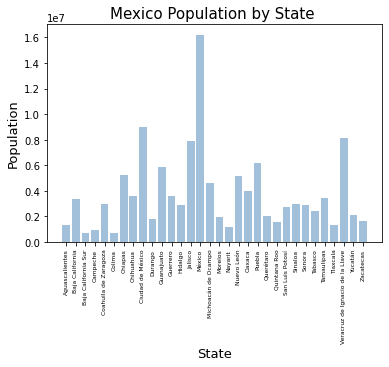

In [88]:
%matplotlib inline
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

#mpl.style.use('ggplot') # optional: for ggplot-like style
plt.bar(df['desc_entidad'], df['Population'], align='center', alpha=0.5,color='steelblue')
#plt.column(df['desc_entidad'])
#df.hist(column="Population")
plt.title('Mexico Population by State ', fontsize = 15)
plt.xlabel('State', fontsize = 13)
plt.ylabel('Population', fontsize = 13)
plt.xticks(rotation = 'vertical', fontsize = 6)
#plt.tight_layout()
plt.show()

*  we will select Ciudad de México (also known as CDMX), because the density/km2 in Mexico State is very small (678.9) against Ciudad de México that has 5,936.8 based on the information in https://geo-mexico.com/?tag=population-densityhttps://geo-mexico.com/?tag=population-density

In [ ]:
#for i in range(0,len(df)):
#    popup = folium.Popup(df['desc_entidad'][i]) 
#    folium.Marker([df['latitude'].iloc[i],df['longitude'].iloc[i]],popup=popup).add_to(communities_map)
#communities_map

## Mexico Population by Municipality

In [71]:
df = pd.read_csv('Mexico_StatePopulation')
df.head()

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,Population
0,1,Aguascalientes,1,Aguascalientes,797010.0
1,1,Aguascalientes,2,Asientos,45492.0
2,1,Aguascalientes,3,Calvillo,54136.0
3,1,Aguascalientes,4,Cosío,15042.0
4,1,Aguascalientes,5,Jesús María,99590.0


In [82]:
bystates = df.groupby(['desc_entidad'])['desc_municipio'].count()
bystates

desc_entidad
Aguascalientes                      11
Baja California                      5
Baja California Sur                  5
Campeche                            11
Chiapas                            119
Chihuahua                           67
Ciudad de México                    16
Coahuila de Zaragoza                38
Colima                              10
Durango                             39
Guanajuato                          46
Guerrero                            81
Hidalgo                             84
Jalisco                            125
Michoacán de Ocampo                113
Morelos                             33
México                             125
Nayarit                             20
Nuevo León                          51
Oaxaca                             570
Puebla                             217
Querétaro                           18
Quintana Roo                         9
San Luis Potosí                     58
Sinaloa                             18
Sonora      

### Number of municipalities by State 

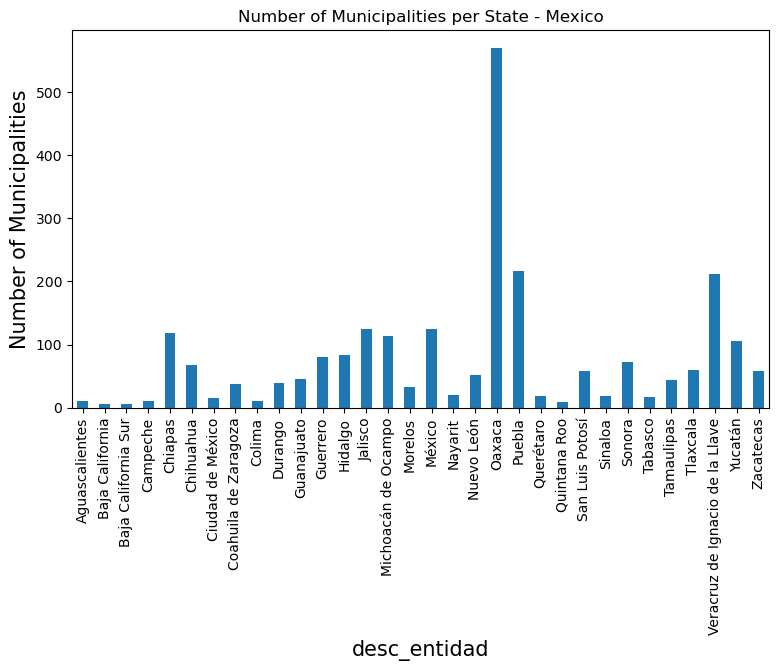

In [83]:
import matplotlib.pyplot  as plt
plt.figure(figsize=(9,5),dpi=100)
plt.title("Number of Municipalities per State - Mexico")
plt.xlabel('State',fontsize=15)
plt.ylabel('Number of Municipalities',fontsize=15)
df.groupby('desc_entidad')['desc_municipio'].count().plot(kind='bar')
plt.legend
plt.show()

In [84]:
CDMX_data = df[df['desc_entidad'] == 'Ciudad de México'].reset_index(drop=True)
CDMX_data.shape


(16, 5)

In [85]:
CDMX_data.sort_values(by=['Population'],ascending=False).head(3)

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,Population
5,9,Ciudad de México,7,Iztapalapa,1815786.0
3,9,Ciudad de México,5,Gustavo A. Madero,1185772.0
8,9,Ciudad de México,10,Álvaro Obregón,727034.0


### Mexico States Population - BarChar using MatPlotlib

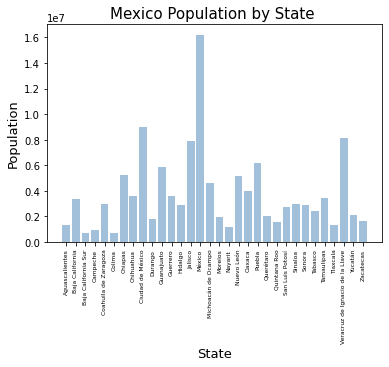

In [16]:
%matplotlib inline
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

#mpl.style.use('ggplot') # optional: for ggplot-like style
plt.bar(df['desc_entidad'], df['Population'], align='center', alpha=0.5,color='steelblue')
#plt.column(df['desc_entidad'])
#df.hist(column="Population")
plt.title('Mexico Population by State ', fontsize = 15)
plt.xlabel('State', fontsize = 13)
plt.ylabel('Population', fontsize = 13)
plt.xticks(rotation = 'vertical', fontsize = 6)
#plt.tight_layout()
plt.show()


### Scatter plot using Seaborn

<AxesSubplot:title={'center':'Mexico Population by State (in millions)'}, xlabel='Population', ylabel='desc_entidad'>

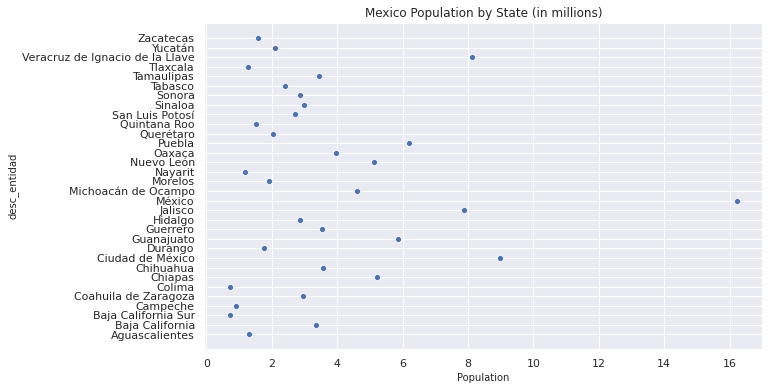

In [37]:
plt.figure(figsize=(10,6))
sns.set()
plt.title('Mexico Population by Municipality (in millions)')
plt.xlabel('State',size=10)
plt.ylabel('Population',size=10)
#sns.set_context('paper', rc={'font.size':8,'axes.titlesize':8,'axes.labelsize':2}) 
#sns.set_style("ticks", {'xtick.major.size': 1, 'ytick.major.size': 1})
sns.scatterplot(df['Population']/1000000, df['desc_entidad'])
#sns.distplot(df['Population']/1000000)

### Line using Matplot

In [ ]:
plt.plot(df['desc_municipio'], df['Population']/1000) 
plt.columns(df['desc_entidad'])
plt.xlabel(df['Municipality'])
plt.ylabel('Population')
plt.title('Mexico Population by Municipality')
plt.grid(True)
plt.legend()
plt.show()



In [39]:
#bins = pd.qcut(df['Population'], q=9)
bins = pd.cut(df['Population'], [0,1000000, 2000000, 3000000, 4000000,5000000,6000000,7000000,8000000,9000000])
df.groupby(bins)['Population'].agg(['count', 'sum'])


,count,sum
Population,,
"(0, 1000000]",3,2335729.0
"(1000000, 2000000]",7,10538349.0
"(2000000, 3000000]",8,20947022.0
"(3000000, 4000000]",5,17890403.0
"(4000000, 5000000]",1,4599104.0
"(5000000, 6000000]",3,16225426.0
"(6000000, 7000000]",1,6183320.0
"(7000000, 8000000]",1,7880539.0
"(8000000, 9000000]",2,17113171.0
